<a href="https://colab.research.google.com/github/ocissor/3D-Face-Reconstruction-and-Morphing/blob/main/3DFaceReconstuction_and_morphing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
from google.colab import drive
drive.mount('/gdrive') 

Mounted at /gdrive


In [ ]:
import requests

def download_file_from_google_drive(id, destination):
    URL = "https://docs.google.com/uc?export=download"

    session = requests.Session()

    response = session.get(URL, params = { 'id' : id }, stream = True)
    token = get_confirm_token(response)

    if token:
        params = { 'id' : id, 'confirm' : token }
        response = session.get(URL, params = params, stream = True)

    save_response_content(response, destination)    

def get_confirm_token(response):
    for key, value in response.cookies.items():
        if key.startswith('download_warning'):
            return value

    return None

def save_response_content(response, destination):
    CHUNK_SIZE = 32768

    with open(destination, "wb") as f:
        for chunk in response.iter_content(CHUNK_SIZE):
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)

if __name__ == "__main__":
    file_id = '0B0A9UsiwtVTHY0p4em5qUzRISW8'
    destination = 'Coarse_Dataset.zip'
    download_file_from_google_drive(file_id, destination)

  


In [ ]:
import requests

def download_file_from_google_drive(id, destination):
    URL = "https://docs.google.com/uc?export=download"

    session = requests.Session()

    response = session.get(URL, params = { 'id' : id }, stream = True)
    token = get_confirm_token(response)

    if token:
        params = { 'id' : id, 'confirm' : token }
        response = session.get(URL, params = params, stream = True)

    save_response_content(response, destination)    

def get_confirm_token(response):
    for key, value in response.cookies.items():
        if key.startswith('download_warning'):
            return value

    return None

def save_response_content(response, destination):
    CHUNK_SIZE = 32768

    with open(destination, "wb") as f:
        for chunk in response.iter_content(CHUNK_SIZE):
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)

if __name__ == "__main__":
    file_id = '176LCdUDxAj7T2awQ5knPMPawq5Q2RUWM'
    destination = 'FaceReconModel.zip'
    download_file_from_google_drive(file_id, destination)


In [ ]:
!git clone https://github.com/microsoft/Deep3DFaceReconstruction

Cloning into 'Deep3DFaceReconstruction'...
remote: Enumerating objects: 82, done.
remote: Counting objects: 100% (82/82), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 399 (delta 48), reused 18 (delta 8), pack-reused 317
Receiving objects: 100% (399/399), 142.38 MiB | 40.62 MiB/s, done.
Resolving deltas: 100% (175/175), done.


In [ ]:
!cp '/gdrive/My Drive/BaselFaceModel.tgz' '/content/BaselFaceModel.tgz'

In [ ]:
!unzip /content/Coarse_Dataset.zip
!unzip /content/FaceReconModel.zip

Archive:  /content/Coarse_Dataset.zip
   creating: Coarse_Dataset/
 extracting: Coarse_Dataset/Sample_code.cpp  
 extracting: Coarse_Dataset/CoarseData.zip  
 extracting: Coarse_Dataset/Exp_Pca.bin  
 extracting: Coarse_Dataset/ReadMe   
Archive:  /content/FaceReconModel.zip
  inflating: FaceReconModel.pb       
  inflating: FaceReconModel.data-00000-of-00001  
  inflating: FaceReconModel.index    
  inflating: FaceReconModel.meta     


In [ ]:
!tar zxvf /content/BaselFaceModel.tgz

PublicMM1/01_MorphableModel.mat
PublicMM1/09_mask/
PublicMM1/09_mask/face05_4seg.mat
PublicMM1/09_mask/face05_4seg.txt
PublicMM1/04_attributes.mat
PublicMM1/11_feature_points/Farkas_face05.fp
PublicMM1/11_feature_points/fit_face05_9.fp
PublicMM1/11_feature_points/MPEG4_FDP_face05.fp
PublicMM1/13_symmetry_indices/
PublicMM1/13_symmetry_indices/face05_symlist.txt
PublicMM1/matlab/
PublicMM1/matlab/script_gen_random_head.m
PublicMM1/matlab/script_render_fittings.m
PublicMM1/matlab/script_load_scan.m
PublicMM1/matlab/object2coef.m
PublicMM1/matlab/idx2intl.m
PublicMM1/matlab/coef2object.m
PublicMM1/matlab/defrp.m
PublicMM1/matlab/load_model.m
PublicMM1/matlab/apply_attributes.m
PublicMM1/matlab/display_face.m
PublicMM1/matlab/plywrite.m


In [ ]:
!cp /content/PublicMM1/01_MorphableModel.mat /content/Deep3DFaceReconstruction/BFM/01_MorphableModel.mat

In [ ]:
!cp /content/Coarse_Dataset/Exp_Pca.bin /content/Deep3DFaceReconstruction/BFM/Exp_Pca.bin

In [ ]:
!cp /content/FaceReconModel.pb /content/Deep3DFaceReconstruction/network/FaceReconModel.pb

cp: cannot create regular file '/content/Deep3DFaceReconstruction/network/FaceReconModel.pb': No such file or directory


In [ ]:
!pip install tensorflow==1.4
%cd Deep3DFaceReconstruction

     |████████████████████████████████| 41.2MB 111kB/s 
     |████████████████████████████████| 1.7MB 41.9MB/s 
     |████████████████████████████████| 890kB 46.6MB/s 
  Created wheel for html5lib: filename=html5lib-0.9999999-cp36-none-any.whl size=107222 sha256=40677543b29d478fd684339ed6e4ea61dcaae9e465ae1c6624c99cc162dfaebb
  Stored in directory: /root/.cache/pip/wheels/50/ae/f9/d2b189788efcf61d1ee0e36045476735c838898eef1cad6e29
Successfully built html5lib
ERROR: stable-baselines 2.2.1 has requirement tensorflow>=1.5.0, but you'll have tensorflow 1.4.0 which is incompatible.
ERROR: magenta 0.3.19 has requirement tensorflow>=1.12.0, but you'll have tensorflow 1.4.0 which is incompatible.
  Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Found existing installation: bleach 3.2.1
    Uninstalling bleach-3.2.1:
      Successfully uninstalled bleach-3.2.1
  Found existing installation: tensorflow 1.15.2
    Unins

/content/Deep3DFaceReconstruction


In [ ]:
#%cd Deep3DFaceReconstruction
%cd /content

/content


In [ ]:
!git clone https://github.com/davisking/dlib-models
#!bzip2 -d '/content/Deep3DFaceReconstruction/dlib-models/shape_predictor_68_face_landmarks.dat.bz2'
!bzip2 -d '/content/dlib-models/shape_predictor_68_face_landmarks.dat.bz2'

Cloning into 'dlib-models'...
remote: Enumerating objects: 28, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 182 (delta 15), reused 11 (delta 1), pack-reused 154
Receiving objects: 100% (182/182), 368.07 MiB | 44.79 MiB/s, done.
Resolving deltas: 100% (87/87), done.


In [ ]:
!cp '/gdrive/MyDrive/model_an.zip' '/content/model_an.zip'

In [ ]:
!unzip /content/model_an.zip -d /content/

Archive:  /content/model_an.zip
   creating: /content/model_an/
  inflating: /content/model_an/120719110724.jpg  
   creating: /content/model_an/3d-gan/
 extracting: /content/model_an/3d-gan/.gitkeep  
  inflating: /content/model_an/3d-gan/3dgan_autoencoder.py  
  inflating: /content/model_an/3d-gan/3dgan_mit_biasfree.py  
  inflating: /content/model_an/3d-gan/dataIO.py  
  inflating: /content/model_an/3d-gan/utils.py  
  inflating: /content/model_an/andreadm2.wrl  
  inflating: /content/model_an/axes3d.py  
  inflating: /content/model_an/bootstrapper.py  
  inflating: /content/model_an/bootstrapper_utils.py  
   creating: /content/model_an/CNN_3D/
 extracting: /content/model_an/CNN_3D/.gitkeep  
  inflating: /content/model_an/CNN_3D/cnn.py  
   creating: /content/model_an/CNN_3D/models/
  inflating: /content/model_an/CNN_3D/models/alexnet_v2.py  
  inflating: /content/model_an/CNN_3D/models/simple.py  
   creating: /content/model_an/CNN_3D/Test/
  inflating: /content/model_an/CNN_3D/T

In [ ]:
!pip install face-alignment

  Created wheel for face-alignment: filename=face_alignment-1.2.0-py2.py3-none-any.whl size=30415 sha256=b672e31f88a8affc7e30230866f00dc6a854270b726ad121e328574bf5c7e5a4
  Stored in directory: /root/.cache/pip/wheels/1b/b3/39/57d29c5566615771abdc7a77ab2f5d66e7bc94201698ebbf88
Successfully built face-alignment


In [ ]:
import urllib.request
urllib.request.urlretrieve ("http://www.micc.unifi.it/vim/wp-content/uploads/datasets/superface-dataset.zip", "superface-dataset.zip")

('superface-dataset.zip', <http.client.HTTPMessage at 0x7fc3a612fc88>)

In [ ]:
!unzip /content/superface-dataset.zip
!unrar x /content/subject001.rar
!unrar x /content/subject002.rar
!unrar x /content/subject003.rar
!unrar x /content/subject004.rar
!unrar x /content/subject005.rar
!unrar x /content/subject006.rar
!unrar x /content/subject007.rar
!unrar x /content/subject008.rar
!unrar x /content/subject009.rar
!unrar x /content/subject010.rar
!unrar x /content/subject011.rar
!unrar x /content/subject012.rar
!unrar x /content/subject013.rar
!unrar x /content/subject014.rar
!unrar x /content/subject015.rar
!unrar x /content/subject016.rar
!unrar x /content/subject017.rar
!unrar x /content/subject018.rar
!unrar x /content/subject019.rar
!unrar x /content/subject020.rar

Streaming output truncated to the last 5000 lines.
Extracting  subject015/depthFrame/frameD157.png                            4%  OK 
Extracting  subject015/depthFrame/frameD158.png                            4%  OK 
Extracting  subject015/depthFrame/frameD159.png                            4%  OK 
Extracting  subject015/depthFrame/frameD16.png                             4%  OK 
Extracting  subject015/depthFrame/frameD160.png                            4%  OK 
Extracting  subject015/depthFrame/frameD161.png                            4%  OK 
Extracting  subject015/depthFrame/frameD162.png                            4%  OK 
Extracting  subject015/depthFrame/frameD163.png                            4%  OK 
Extracting  subject015/depthFrame/frameD164.png                            4%  OK 
Extracting  subject015/depthFrame/frameD165.png                            4%  OK 
Extracting  subject015/depthF

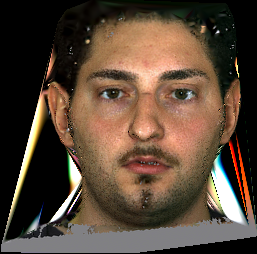

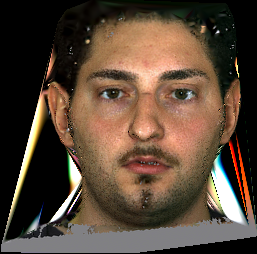

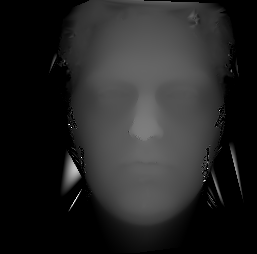

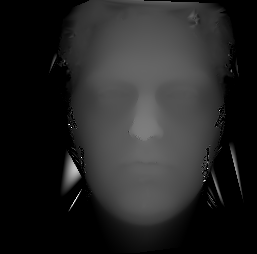

Downloading: "https://www.adrianbulat.com/downloads/python-fan/s3fd-619a316812.pth" to /root/.cache/torch/hub/checkpoints/s3fd-619a316812.pth


Downloading: "https://www.adrianbulat.com/downloads/python-fan/2DFAN4-11f355bf06.pth.tar" to /root/.cache/torch/hub/checkpoints/2DFAN4-11f355bf06.pth.tar



255


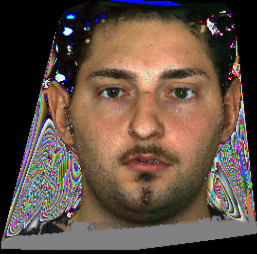

255


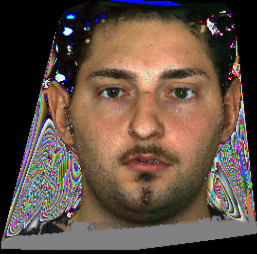

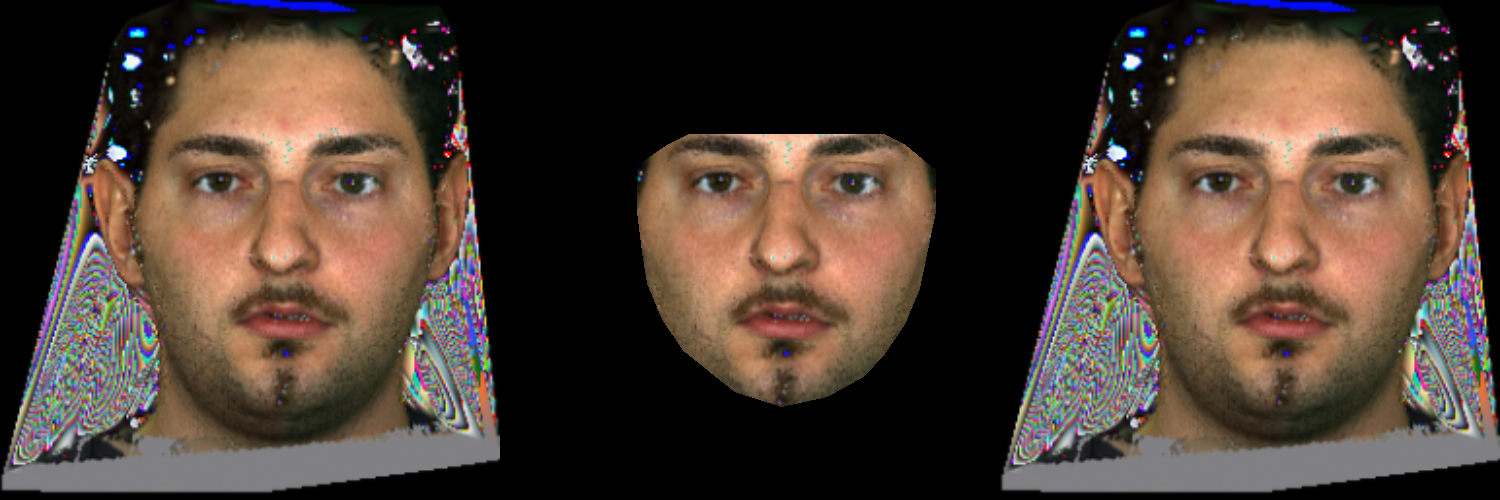

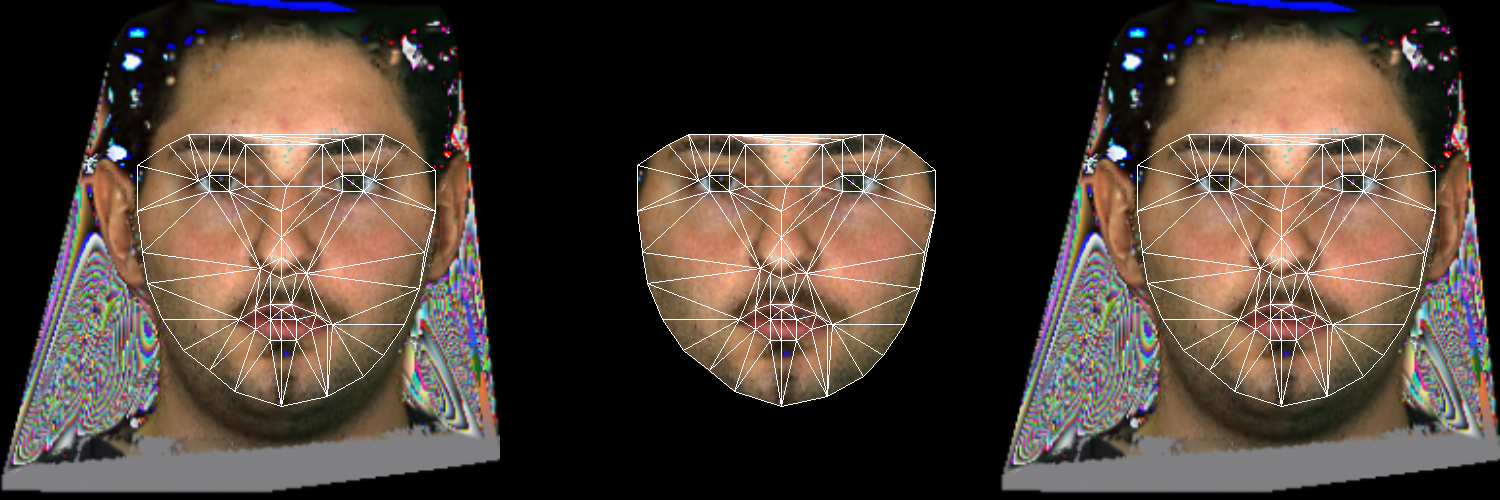

255
(500, 500, 3)


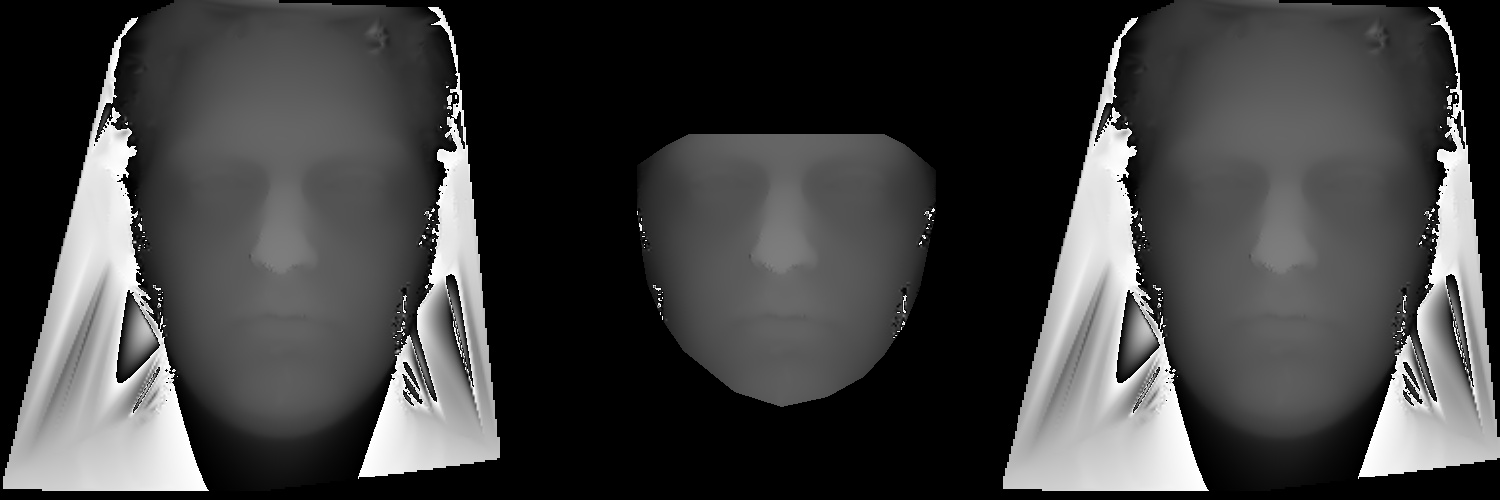

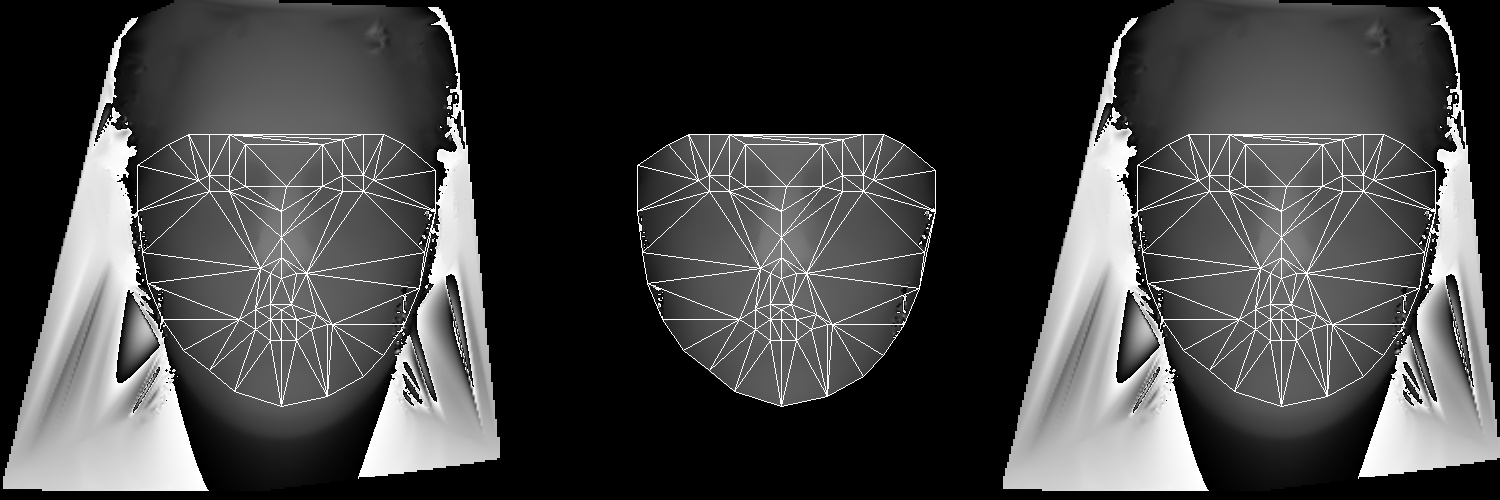

In [ ]:
from os.path import dirname,abspath,join
import sys
import numpy as np
import cv2
import scipy.interpolate as interp
from google.colab.patches import cv2_imshow
my_dir = '/content/model_an/'
sys.path.append(my_dir)
import new_rendering
from new_rendering import inverse_renderer
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import cv2
from google.colab.patches import cv2_imshow
import dlib
from imutils import face_utils
from scipy.spatial import Delaunay
import face_alignment
from PIL import Image 
import PIL
import pickle as pkl

def test_rendering_depth(path_to_wrl,name_of_depth_file):
    inv = inverse_renderer()
    shape_arr, texture, uv_array = inv.read(path_to_wrl)
    uv_array = np.array(uv_array)
    texture = np.array(texture)
    shape_arr = np.array(shape_arr)
    uv_array = uv_array[:,0:2]

    x = shape_arr[:,0]
    y = shape_arr[:,1]

    x += np.abs(np.min(shape_arr[:,0]))
    y += np.abs(np.min(shape_arr[:,1]))
    
    z = shape_arr[:,2]
    interpolator_z = interp.CloughTocher2DInterpolator(np.array([x,y]).T, z)

    img_z = np.zeros((int(np.max(x)),int(np.max(y))))
    
    for pixel_x in range(0,int(np.max(x))):
      for pixel_y in range(0,int(np.max(y))):
        img_z[pixel_x][pixel_y] = interpolator_z(pixel_x, pixel_y)

    image = cv2.rotate(img_z, cv2.ROTATE_90_COUNTERCLOCKWISE)
    cv2_imshow(image)
    
    return image 
    #cv2.imwrite('{}.jpg'.format(name_of_depth_file),image)
    pass

def test_rendering_texture(path_to_wrl,name_of_texture_file):
    inv = inverse_renderer()
    shape_arr, texture, uv_array = inv.read(path_to_wrl)
    #uv_array = np.unique(np.array(uv_array))
    uv_array = np.array(uv_array)
    texture = np.array(texture)
    shape_arr = np.array(shape_arr)
    uv_array = uv_array[:,0:2]

    x = uv_array[:,0]
    y = uv_array[:,1]

    x += np.abs(np.min(uv_array[:,0]))
    y += np.abs(np.min(uv_array[:,1]))
    
    z_red = texture[:,0] * 255.0
    interpolator_red = interp.CloughTocher2DInterpolator(np.array([x,y]).T, z_red)

    z_green = texture[:,1] * 255.0
    interpolator_green = interp.CloughTocher2DInterpolator(np.array([x,y]).T, z_green)

    z_blue = texture[:,2] * 255.0
    interpolator_blue = interp.CloughTocher2DInterpolator(np.array([x,y]).T, z_blue)

    img_red = np.zeros((int(np.max(x)),int(np.max(y))))
    img_green = np.zeros((int(np.max(x)),int(np.max(y))))
    img_blue = np.zeros((int(np.max(x)),int(np.max(y))))
    
    for pixel_x in range(0,int(np.max(x))):
      for pixel_y in range(0,int(np.max(y))):
        img_red[pixel_x][pixel_y] = interpolator_red(pixel_x, pixel_y)
        img_green[pixel_x][pixel_y] = interpolator_green(pixel_x, pixel_y)
        img_blue[pixel_x][pixel_y] = interpolator_blue(pixel_x, pixel_y)

    image = cv2.merge((img_blue,img_green,img_red))
    image = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
    cv2_imshow(image)
    
    return image
    #cv2.imwrite('{}.jpg'.format(name_of_texture_file),image)
    pass


shape_list = []
texture_list = []


for n in range(8,9):
  reference_texture = test_rendering_texture('/content/subject008/3d/subject008.wrl','reference_texture')
  texture_unit = test_rendering_texture('/content/subject008/3d/subject008.wrl'.format(n,n),'transform_texture')

  reference_depth = test_rendering_depth('/content/subject008/3d/subject008.wrl','reference_depth')
  shape_unit = test_rendering_depth('/content/subject008/3d/subject008.wrl'.format(n,n),'transform_depth')


  img = reference_texture
  img_shape = img.shape
  img = img.astype(np.uint8)

  if img.shape[0]==img.shape[1]:
    img = cv2.resize(img,(500,500))
    z = np.zeros((500,500,3))
    z[:,:,:]=img
    img = z.astype(np.uint8)

  if img.shape != (500,500,3):
    x = [img.shape[0],img.shape[1]]
    y = max(x[0],x[1])
    idx = x.index(y)
    if idx == 0:
      aspectratio = x[idx]/x[idx+1]
      x[idx]=500
      x[idx+1] = int(x[idx]/aspectratio)
      img = cv2.resize(img,(x[idx+1],x[idx]))
    else:
      aspectratio = x[idx]/x[idx-1]
      x[idx]=500
      x[idx-1] = int(x[idx]/aspectratio)
      img = cv2.resize(img,(x[idx],x[idx-1]))

    z = np.zeros((500,500,3))
    if n==8:
      z[0:img.shape[0],:,:] = img
    #z[:,10:img.shape[1]+10,:]=img
    img = z.astype(np.uint8)

  gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  detector = dlib.get_frontal_face_detector()
  #predictor = dlib.shape_predictor('/content/dlib-models/shape_predictor_68_face_landmarks.dat')#landmark predictor.
  predictor = face_alignment.FaceAlignment(face_alignment.LandmarksType._2D, device='cpu', flip_input=False)
  rects = detector(gray,1)

  coords = []
  imgcopy = img.copy()
  for (i, rect) in enumerate(rects):
    # determine the facial landmarks for the face region, then
    # convert the facial landmark (x, y)-coordinates to a NumPy
    # array
    shape = predictor.get_landmarks(gray)
    #shape = face_utils.shape_to_np(shape)
    shape = np.asarray(shape)
    pts = shape[0]
    for i in range(len(pts)):
      x = pts[i][0]
      y = pts[i][1]
      cv2.circle(imgcopy, (x, y), 1, (0, 0, 255), -1)
      coords.append((x,y))
    # loop over the (x, y)-coordinates for the facial landmarks
    # and draw them on the image

  f = open('reference.txt', 'w')
  for t in coords:
      line = ' '.join(str(x) for x in t)
      f.write(line + '\n')
  f.close()

  img_reference = cv2.resize(img, (img_shape[1],img_shape[0]))
  print (np.max(img_reference))
  cv2_imshow(img_reference)

  img = texture_unit
  img_shape = img.shape
  img = img.astype(np.uint8)

  if img.shape[0]==img.shape[1]:
    img = cv2.resize(img,(500,500))
    z = np.zeros((500,500,3))
    z[:,:,:]=img
    img = z.astype(np.uint8)

  if img.shape != (500,500,3):
    x = [img.shape[0],img.shape[1]]
    y = max(x[0],x[1])
    idx = x.index(y)
    if idx == 0:
      aspectratio = x[idx]/x[idx+1]
      x[idx]=500
      x[idx+1] = int(x[idx]/aspectratio)
      img = cv2.resize(img,(x[idx+1],x[idx]))
    else:
      aspectratio = x[idx]/x[idx-1]
      x[idx]=500
      x[idx-1] = int(x[idx]/aspectratio)
      img = cv2.resize(img,(x[idx],x[idx-1]))
    z = np.zeros((500,500,3))
    if n==8:
      z[0:img.shape[0],:,:] = img
    #z[:,10:img.shape[1]+10,:]=img
    img = z.astype(np.uint8)

  gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  detector = dlib.get_frontal_face_detector()
  #predictor = dlib.shape_predictor('/content/dlib-models/shape_predictor_68_face_landmarks.dat')
  predictor = face_alignment.FaceAlignment(face_alignment.LandmarksType._2D,device='cpu', flip_input=False)
  rects = detector(gray,1)
  coords = []
  imgcopy = img.copy()
  for (i, rect) in enumerate(rects):
    # determine the facial landmarks for the face region, then
    # convert the facial landmark (x, y)-coordinates to a NumPy
    # array
    shape = predictor.get_landmarks(gray)
    #shape = face_utils.shape_to_np(shape)
    shape = np.asarray(shape)
    pts = shape[0]
    for i in range(len(pts)):
      x = pts[i][0]
      y = pts[i][1]
      cv2.circle(imgcopy, (x, y), 1, (0, 0, 255), -1)
      coords.append((x,y))
    # loop over the (x, y)-coordinates for the facial landmarks
    # and draw them on the image

  f = open('transform.txt', 'w')
  for t in coords:
      line = ' '.join(str(x) for x in t)
      f.write(line + '\n')
  f.close()
  # not really 'transformed' but resized
  img_transformed = cv2.resize(img, (img_shape[1],img_shape[0]))
  print (np.max(img_transformed))
  cv2_imshow(img_transformed)

  
  # Read points from text file
  def readPoints(path) :
      # Create an array of points.
      points = [];
      # Read points
      with open(path) as file :
          for line in file :
              x, y = line.split()
              points.append((int(float(x)), int(float(y))))

      return points

  # Apply affine transform calculated using srcTri and dstTri to src and
  # output an image of size.
  def applyAffineTransform(src, srcTri, dstTri, size) :
      
      # Given a pair of triangles, find the affine transform.
      warpMat = cv2.getAffineTransform( np.float32(srcTri), np.float32(dstTri) )
      
      # Apply the Affine Transform just found to the src image
      dst = cv2.warpAffine( src, warpMat, (size[0], size[1]), None, flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REFLECT_101 )

      return dst

  def rect_contains(rect, point) :
      if point[0] < rect[0] :
          return False
      elif point[1] < rect[1] :
          return False
      elif point[0] > rect[2] :
          return False
      elif point[1] > rect[3] :
          return False
      return True


  # Warps and alpha blends triangular regions from img1 and img2 to img
  def morphTriangle(img1, img2, img, t1, t2, t, alpha) :

      # Find bounding rectangle for each triangle
      r1 = cv2.boundingRect(np.float32([t1]))
      r2 = cv2.boundingRect(np.float32([t2]))
      r = cv2.boundingRect(np.float32([t]))


      # Offset points by left top corner of the respective rectangles
      t1Rect = []
      t2Rect = []
      tRect = []


      for i in range(0, 3):
          tRect.append(((t[i][0] - r[0]),(t[i][1] - r[1])))
          t1Rect.append(((t1[i][0] - r1[0]),(t1[i][1] - r1[1])))
          t2Rect.append(((t2[i][0] - r2[0]),(t2[i][1] - r2[1])))


      # Get mask by filling triangle
      mask = np.zeros((r[3], r[2], 3), dtype = np.float32)
      cv2.fillConvexPoly(mask, np.int32(tRect), (1.0, 1.0, 1.0), 16, 0);

      # Apply warpImage to small rectangular patches
      img1Rect = img1[r1[1]:r1[1] + r1[3], r1[0]:r1[0] + r1[2]]
      img2Rect = img2[r2[1]:r2[1] + r2[3], r2[0]:r2[0] + r2[2]]

      size = (r[2], r[3])
      warpImage1 = applyAffineTransform(img1Rect, t1Rect, tRect, size)
      warpImage2 = applyAffineTransform(img2Rect, t2Rect, tRect, size)

      # Alpha blend rectangular patches
      imgRect = warpImage1

      # Copy triangular region of the rectangular patch to the output image
      img[r[1]:r[1]+r[3], r[0]:r[0]+r[2]] = img[r[1]:r[1]+r[3], r[0]:r[0]+r[2]] * ( 1 - mask ) + imgRect * mask

  def draw_point(img, p, color ) :
      cv2.circle(img, p, 2, color, -1)


  # Draw delaunay triangles
  def draw_delaunay(img, subdiv, delaunay_color ) :

      triangle_coords = []
      triangleList = subdiv.getTriangleList();
      size = img.shape
      r = (0, 0, size[1], size[0])

      for t in triangleList :
          
          pt1 = (t[0], t[1])
          pt2 = (t[2], t[3])
          pt3 = (t[4], t[5])
          
          
          if rect_contains(r, pt1) and rect_contains(r, pt2) and rect_contains(r, pt3) :
          
              cv2.line(img, pt1, pt2, delaunay_color, 1, cv2.LINE_AA, 0)
              cv2.line(img, pt2, pt3, delaunay_color, 1, cv2.LINE_AA, 0)
              cv2.line(img, pt3, pt1, delaunay_color, 1, cv2.LINE_AA, 0)

  '''
  filename1 = '/content/transform_texture.jpg' #Image to be transformed.
  filename2 = '/content/reference_texture.jpg' #Reference Image
  '''

  alpha = 1    # Read images
  img1 = img_transformed;
  img2 = img_reference;
  img_1_shape = img1.shape
  img_2_shape = img2.shape
  img1 = cv2.resize(img1,(500,500))
  img2 = cv2.resize(img2,(500,500))
      
      # Convert Mat to float data type
  img1 = np.float32(img1)
  img2 = np.float32(img2)

      # Read array of corresponding points
  points1 = readPoints('transform.txt')
  points2 = readPoints('reference.txt')
  points = [];
  points_2 = [];

      # Compute weighted average point coordinates
  for i in range(0, len(points1)):
      x = ( 1 - alpha ) * points1[i][0] + alpha * points2[i][0]
      y = ( 1 - alpha ) * points1[i][1] + alpha * points2[i][1]
      points.append((int(x),int(y)))

  for i in range(0, len(points1)):
      x = ( 1 - alpha ) * points2[i][0] + alpha * points1[i][0]
      y = ( 1 - alpha ) * points2[i][1] + alpha * points1[i][1]
      points_2.append((int(x),int(y)))


      # Allocate space for final output
  imgMorph = np.zeros(img1.shape, dtype = img1.dtype)

  size_1 = img1.shape
  rect_1 = (0, 0, size_1[1], size_1[0])
  subdiv_1  = cv2.Subdiv2D(rect_1);

  size_2 = img2.shape
  rect_2 = (0, 0, size_2[1], size_2[0])
  subdiv_2 =  cv2.Subdiv2D(rect_2);

  for p in points:
    subdiv_1.insert(p)
  for p in points_2:
    subdiv_2.insert(p)

  img1_tri = img1.copy()
  img2_tri = img2.copy()

  draw_delaunay(img1_tri, subdiv_2, (255, 255, 255))
  draw_delaunay(img2_tri, subdiv_1, (255, 255, 255))
  

  tri = Delaunay(points)
  tri_index = np.array(tri.simplices)
  for element in tri_index:      
    x = element[0]
    y = element[1]
    z = element[2]
              
    t1 = [points1[x], points1[y], points1[z]]
    t2 = [points2[x], points2[y], points2[z]]
    t = [ points[x], points[y], points[z] ]

        
    morphTriangle(img1, img2, imgMorph, t1, t2, t, alpha)
    imgMorph_tri = imgMorph.copy()
    draw_delaunay(imgMorph_tri, subdiv_1, (255, 255, 255))

      # Display Result
  compare = np.hstack((img1,imgMorph,img2))

  texture_1 = imgMorph
  cv2.imwrite('texture_transformed{}.jpg'.format(n),imgMorph)

  compare_1 = np.hstack((img1_tri, imgMorph_tri, img2_tri))
  cv2_imshow(np.uint8(compare))
  print ('\n')
  cv2_imshow(np.uint8(compare_1))
  # with open('Imgmorph'+str(n)+'.pkl','wb') as f:
  #   pkl.dump(imgMorph, f)

  '''
  filename1 = '/content/transform_depth.jpg' #Image to be transformed.
  filename2 = '/content/reference_depth.jpg' #Reference Image
  '''
  #################################################################################################################################################################################
  #depth part starts here
  alpha = 1    # Read images
  img1 = shape_unit
  img2 = reference_depth
  if img1.shape[0]==img1.shape[1]:
    img1 = cv2.resize(img1,(500,500))
    z = np.zeros((500,500))
    z[:,:]=img1
    img1 = z.astype(np.uint8)

  if img1.shape != (500,500):
    x = [img1.shape[0],img1.shape[1]]
    y = max(x[0],x[1])
    idx = x.index(y)
    if idx == 0:
      aspectratio = x[idx]/x[idx+1]
      x[idx]=500
      x[idx+1] = int(x[idx]/aspectratio)
      img1 = cv2.resize(img1,(x[idx+1],x[idx]))
    else:
      aspectratio = x[idx]/x[idx-1]
      x[idx]=500
      x[idx-1] = int(x[idx]/aspectratio)
      img1 = cv2.resize(img1,(x[idx],x[idx-1]))

    z = np.zeros((500,500))
    if n==8:
      z[0:img1.shape[0],:] = img1
    #z[:,10:img1.shape[1]+10]=img1
    img1 = z.astype(np.uint8)

  if img2.shape[0]==img2.shape[1]:
    img2 = cv2.resize(img2,(500,500))
    z = np.zeros((500,500))
    z[:,:]=img2
    img2 = z.astype(np.uint8)

  if img2.shape != (500,500):
    x = [img2.shape[0],img2.shape[1]]
    y = max(x[0],x[1])
    idx = x.index(y)
    if idx == 0:
      aspectratio = x[idx]/x[idx+1]
      x[idx]=500
      x[idx+1] = int(x[idx]/aspectratio)
      img2 = cv2.resize(img2,(x[idx+1],x[idx]))
    else:
      aspectratio = x[idx]/x[idx-1]
      x[idx]=500
      x[idx-1] = int(x[idx]/aspectratio)
      img2 = cv2.resize(img2,(x[idx],x[idx-1]))

    z = np.zeros((500,500))
    if n==8:
      z[0:img2.shape[0],:] = img2
    #z[:,10:img2.shape[1]+10]=img2
    img2 = z.astype(np.uint8)
  
  cv2.imwrite('img1.jpg',img1)
  cv2.imwrite('img2.jpg',img2)

  img1 = cv2.imread('img1.jpg')
  img2 = cv2.imread('img2.jpg')

  print (np.max(img1))

  img_1_shape = img1.shape
  img_2_shape = img2.shape
  img1 = cv2.resize(img1,(500,500))
  img2 = cv2.resize(img2,(500,500))
      
      # Convert Mat to float data type
  img1 = np.float32(img1)
  img2 = np.float32(img2)
  #assert False

      # Read array of corresponding points
  points1 = readPoints('transform.txt')
  points2 = readPoints('reference.txt')
  points = [];
  points_2 = [];

      # Compute weighted average point coordinates
  for i in range(0, len(points1)):
      x = ( 1 - alpha ) * points1[i][0] + alpha * points2[i][0]
      y = ( 1 - alpha ) * points1[i][1] + alpha * points2[i][1]
      points.append((int(x),int(y)))

  for i in range(0, len(points1)):
      x = ( 1 - alpha ) * points2[i][0] + alpha * points1[i][0]
      y = ( 1 - alpha ) * points2[i][1] + alpha * points1[i][1]
      points_2.append((int(x),int(y)))


  # Allocate space for final output
  imgMorph = np.zeros(img1.shape, dtype = img1.dtype)

  size_1 = img1.shape
  rect_1 = (0, 0, size_1[1], size_1[0])
  subdiv_1  = cv2.Subdiv2D(rect_1);

  size_2 = img2.shape
  rect_2 = (0, 0, size_2[1], size_2[0])
  subdiv_2 =  cv2.Subdiv2D(rect_2);

  for p in points:
    subdiv_1.insert(p)
  for p in points_2:
    subdiv_2.insert(p)

  img1_tri = img1.copy()
  img2_tri = img2.copy()

  draw_delaunay(img1_tri, subdiv_2, (255, 255, 255))
  draw_delaunay(img2_tri, subdiv_1, (255, 255, 255))
  tri = Delaunay(points)
  tri_index = np.array(tri.simplices)
  for element in tri_index:      
    x = element[0]
    y = element[1]
    z = element[2]
              
    t1 = [points1[x], points1[y], points1[z]]
    t2 = [points2[x], points2[y], points2[z]]
    t = [ points[x], points[y], points[z] ]

    morphTriangle(img1, img2, imgMorph, t1, t2, t, alpha)
    imgMorph_tri = imgMorph.copy()
    draw_delaunay(imgMorph_tri, subdiv_1, (255, 255, 255))

      # Display Result
  compare = np.hstack((img1,imgMorph,img2))
  # with open('ShapeImgMorph'+str(n)+'.pkl','wb') as f:
  #   pkl.dump(imgMorph, f)
  print (imgMorph.shape)
  imgMorph = cv2.cvtColor(imgMorph, cv2.COLOR_BGR2GRAY)
  shape_1 = imgMorph

  cv2.imwrite('depth_transformed{}.jpg'.format(n),imgMorph)

  compare_1 = np.hstack((img1_tri, imgMorph_tri, img2_tri))
  cv2_imshow(np.uint8(compare))
  print ('\n')
  cv2_imshow(np.uint8(compare_1))

In [ ]:
import shutil
for i in range(1,21):
  MorphedImagePath = '/content/'+'Imgmorph'+str(i)+'.pkl'
  dst_path = '/gdrive/MyDrive/'+'Imgmorph'+str(i)+'.pkl'
  shutil.copyfile(MorphedImagePath,dst_path)

for i in range(1,21):
  MorphedImagePath = '/content/'+'ShapeImgMorph'+str(i)+'.pkl'
  dst_path = '/gdrive/MyDrive/'+'ShapeImgMorph'+str(i)+'.pkl'
  shutil.copyfile(MorphedImagePath,dst_path)

**Face Reconstruction of Texture Images using EigenFaces**

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
images = []
shapeImages = []
for i in range(1,21):
  MorphedImagePath = '/gdrive/MyDrive/'+'Imgmorph'+str(i)+'.pkl'
  ShapeImgPath = '/gdrive/MyDrive/'+'ShapeImgMorph'+str(i)+'.pkl'
  with open(ShapeImgPath,'rb') as f:     
    ShapeImg = pkl.load(f)
  with open(MorphedImagePath,'rb') as f:     
    MorphedImg = pkl.load(f)
  MorphedImg = MorphedImg.astype(np.uint8)
  boundingBox = detector(MorphedImg)
  for face in boundingBox:
    x1 = face.left()
    y1 = face.top() #could be face.bottom() - not sure
    x2 = face.right()
    y2 = face.bottom()
  #assert False
  MorphedImg = MorphedImg[y1:y2,x1:x2]
  ShapeImg = ShapeImg[y1:y2,x1:x2]
  MorphedImg = cv2.resize(MorphedImg, (250,250))
  ShapeImg = cv2.resize(ShapeImg,(250,250))
  MorphedImg = MorphedImg.astype(np.uint8)
  ShapeImg = ShapeImg.astype(np.uint8)
  ShapeImgVect = ShapeImg.flatten()
  MorphedImgVect = MorphedImg.flatten()
  images.append(MorphedImgVect)
  shapeImages.append(ShapeImgVect)

sz = images[0].shape
data = np.zeros((20,sz[0]),dtype=np.float32)
shapeData = np.zeros((20,sz[0]),dtype=np.float32)
DataMean = 0 
for i in range(len(data)):
  data[i] = images[i]
  shapeData[i] = shapeImages[i]
  DataMean += data[i] 

DataMean = DataMean/len(data)
DataMean = np.clip(DataMean,a_min=0,a_max=255)
newImage = data[0]
newImage = newImage-DataMean
data = pd.DataFrame(data = data)
data = scaler.fit_transform(data)

shapeData = pd.DataFrame(data = shapeData)
shapeData = scaler.fit_transform(shapeData)

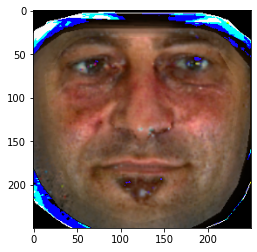

In [ ]:
pca = PCA(n_components=20)
principalComponents = pca.fit_transform(data)
principalDf = pd.DataFrame(data = principalComponents)

eigenVectors = pca.components_
mean = pca.mean_
eigenValueMatrix = pca.explained_variance_
FaceReconstructed = DataMean

for i in range(len(eigenVectors)):
  weight = np.dot(newImage,eigenVectors[i])
  FaceReconstructed +=  weight*eigenVectors[i]

FaceReconstructed = FaceReconstructed.reshape((250,250,3))
FaceReconstructed = FaceReconstructed.astype(np.uint8)
FaceReconstructed= cv2.cvtColor(FaceReconstructed, cv2.COLOR_BGR2RGB)
plt.imshow(FaceReconstructed)

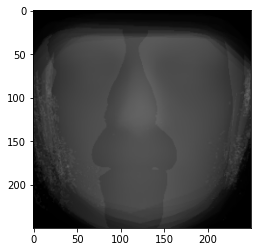

In [ ]:
pca = PCA(n_components=20)
principalComponents = pca.fit_transform(shapeData)
principalDf = pd.DataFrame(data = principalComponents)

eigenVectors = pca.components_
mean = pca.mean_
eigenValueMatrix = pca.explained_variance_
eigenValueMatrix = eigenValueMatrix.reshape((1,20))
z = np.ones_like(eigenValueMatrix)
FaceReconstructed = mean + (z @ eigenVectors) 

FaceReconstructed = scaler.inverse_transform(FaceReconstructed)
FaceReconstructed = FaceReconstructed.reshape((250,250,3))
FaceReconstructed = FaceReconstructed.astype(np.uint8)
FaceReconstructed= cv2.cvtColor(FaceReconstructed, cv2.COLOR_BGR2RGB)
plt.imshow(FaceReconstructed)